In [5]:
#!pip install seaborn

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [8]:

# Loading and preprocessing steps
df = pd.read_csv('./archive/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


C:\Users\janak\AppData\Local\Temp\ipykernel_18172\2097969729.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 0, 'Date')

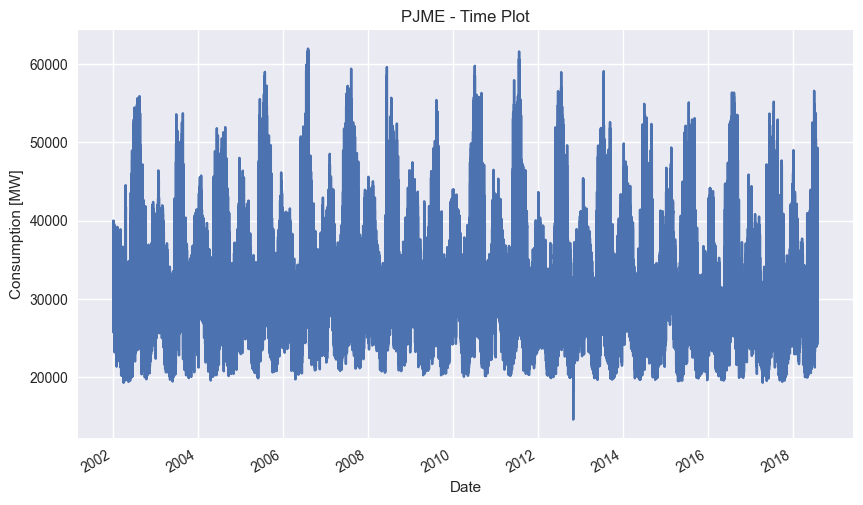

In [9]:

# Set pyplot style
plt.style.use("seaborn")

# Plot
df['PJME_MW'].plot(title='PJME - Time Plot', figsize=(10,6))
plt.ylabel('Consumption [MW]')
plt.xlabel('Date')

In [11]:
# Defining required fields
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x:x.week)
df = df.set_index('Datetime')
df['hour'] = [x for x in df.index.hour]
df['day'] = [x for x in df.index.day_of_week]
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]

In [24]:
df.head()

,PJME_MW,year,month,week,hour,day,day_str,year_month
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,1,1,Tue,2002_12
2002-12-31 02:00:00,25147.0,2002,12,1,2,1,Tue,2002_12
2002-12-31 03:00:00,24574.0,2002,12,1,3,1,Tue,2002_12
2002-12-31 04:00:00,24393.0,2002,12,1,4,1,Tue,2002_12
2002-12-31 05:00:00,24860.0,2002,12,1,5,1,Tue,2002_12


### Seasonal plot — Yearly consumption

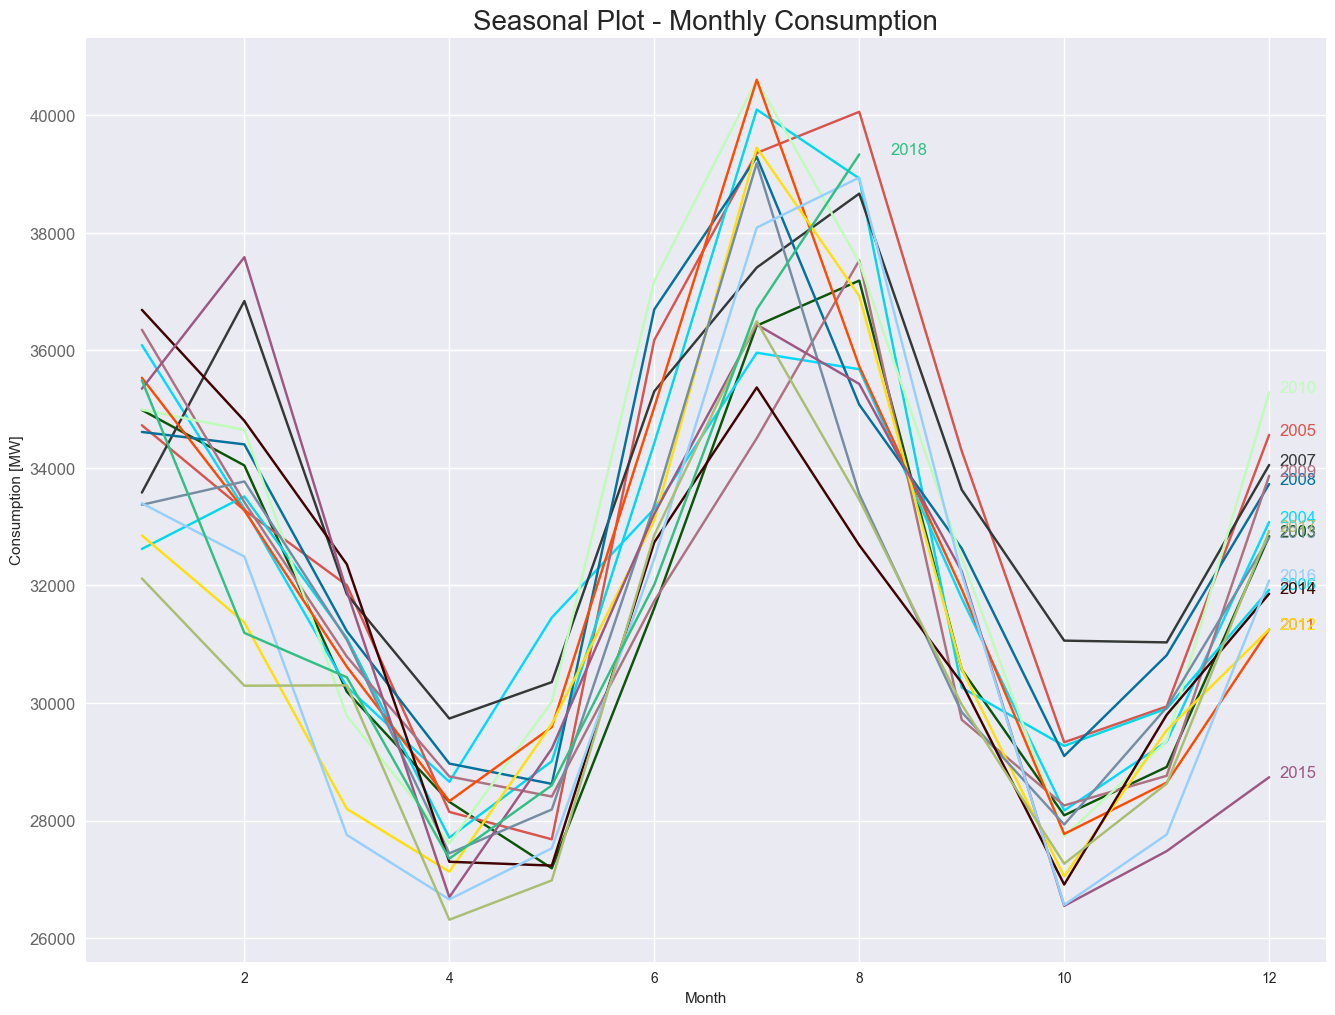

In [38]:
# Defining colors palette
np.random.seed(42)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'PJME_MW', data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])

# Setting labels
plt.gca().set(ylabel= 'PJME_MW', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Month')
plt.show()

In [34]:
colors

array(['xkcd:mud green', 'xkcd:forest', 'xkcd:neon blue', 'xkcd:pale red',
       'xkcd:aqua blue', 'xkcd:charcoal', 'xkcd:ocean blue', 'xkcd:mauve',
       'xkcd:celadon', 'xkcd:blood orange', 'xkcd:dandelion',
       'xkcd:blue/grey', 'xkcd:deep brown', 'xkcd:light plum',
       'xkcd:light blue', 'xkcd:tan green', 'xkcd:greenish teal'],
      dtype='<U31')